# Clustering

# 1. Concepts

## 1.1 Intro

**Clustering** is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. In practice, clustering helps identify two qualities of data:
- Meaningfulness
- Usefulness

**Meaningful clusters** expand domain knowledge. For example, in the medical field, researchers applied clustering to gene expression experiments. The clustering results identified groups of patients who respond differently to medical treatments.

**Useful clusters**, on the other hand, serve as an intermediate step in a data pipeline. For example, businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.

## 1.2 Partitional Clustering

Partitional clustering divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object.

These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. Two examples of partitional clustering algorithms are k-means and k-medoids.

These algorithms are both nondeterministic, meaning they could produce different results from two separate runs even if the runs were based on the same input.

Pros:
- They work well when clusters have a spherical shape.
- They’re scalable with respect to algorithm complexity.

Cons:
- They’re not well suited for clusters with complex shapes and different sizes.
- They break down when used with clusters of different densities.

### 1.2.1 K-Means Clustering

Algorithm:
1. Specify the number of clusters, k
2. Randomly initialize k centroids in the data space
3. Rpeat
    - Assign each data point to the closest centroid
    - Compute the new centroids by averaging the data in each cluster
4. Stop when the centroids remain the same after an iteration (convergence)

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

The random initialization step causes the k-means algorithm to be nondeterministic, meaning that cluster assignments will vary if you run the same algorithm twice on the same dataset. Researchers commonly run several initializations of the entire k-means algorithm and choose the cluster assignments from the initialization with the lowest SSE.

## 1.3 Hierarchical Clustering

Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:

Agglomerative clustering is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a dendrogram. Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

Pros:

- They often reveal the finer details about the relationships between data objects.
- They provide an interpretable dendrogram.

Cons:

- They’re computationally expensive with respect to algorithm complexity.
- They’re sensitive to noise and outliers.

## 1.4 Density-Based Clustering
Density-based clustering determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.

Unlike the other clustering categories, this approach doesn’t require the user to specify the number of clusters. Instead, there is a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.

Pros:
- They excel at identifying clusters of nonspherical shapes.
- They’re resistant to outliers.

Cons:
- They aren’t well suited for clustering in high-dimensional spaces.
- They have trouble identifying clusters of varying densities.

# 2. Code Examples

## 2.1 K-Means & K-Medoids

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs

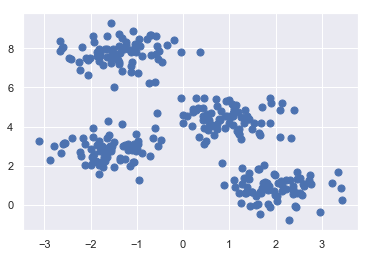

In [5]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

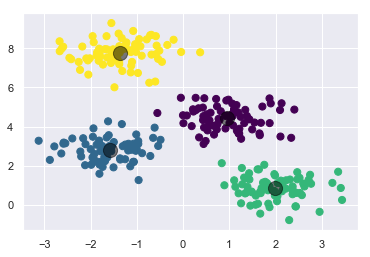

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [11]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4)
kmedoids.fit(X)
y_kmedoids = kmedoids.predict(X)

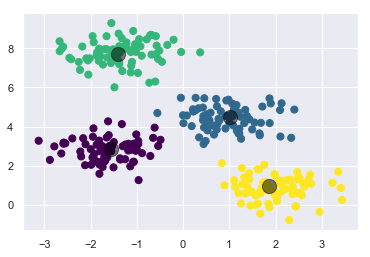

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmedoids, s=50, cmap='viridis')

centers = kmedoids.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)